Import libraries

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import keras.backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input as inception_preprocess_input
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.layers import Input,Flatten,Dense,Dropout
from keras.layers.normalization import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
import os
import seaborn as sns
import numpy as np
import pandas as pd

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

Import caltech256 dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive',  force_remount=True)

Mounted at /content/gdrive


In [3]:
!cp "/content/gdrive/MyDrive/aml_project/caltech256.zip" "caltech256"

In [4]:
!unzip -uq "caltech256" #-d "folder where you want them unzipped (or just make one up)"

-----------------------------------------------------------------
-----------------------------------------------------------------

Dataset link: https://www.kaggle.com/jessicali9530/caltech256

Dataset set size: 30,607 images.

Number of classes: 257.

In [5]:
main_folder = "/content/256_ObjectCategories"
labels = os.listdir(main_folder)
print(labels)

['113.hummingbird', '190.snake', '079.frisbee', '084.giraffe', '017.bowling-ball', '002.american-flag', '111.house-fly', '218.tennis-racket', '243.welding-mask', '178.school-bus', '154.palm-tree', '189.snail', '191.sneaker', '140.menorah-101', '217.tennis-court', '167.pyramid', '211.tambourine', '160.pez-dispenser', '245.windmill', '232.t-shirt', '059.drinking-straw', '040.cockroach', '239.washing-machine', '201.starfish-101', '147.mushroom', '170.rainbow', '165.pram', '198.spider', '213.teddy-bear', '254.greyhound', '146.mountain-bike', '149.necktie', '007.bat', '251.airplanes-101', '156.paper-shredder', '021.breadmaker', '027.calculator', '168.raccoon', '247.xylophone', '231.tripod', '233.tuning-fork', '082.galaxy', '066.ewer-101', '045.computer-keyboard', '179.scorpion-101', '204.sunflower-101', '194.socks', '219.theodolite', '216.tennis-ball', '200.stained-glass', '225.tower-pisa', '230.trilobite-101', '126.ladder', '256.toad', '055.dice', '101.head-phones', '241.waterfall', '192.s

In [6]:
x = np.zeros((30608,100,100,3),dtype=np.float32)
y = []
i=0
for folder in os.listdir(main_folder):
    image_list=os.listdir(main_folder+"/"+folder)
    for img_name in image_list:
      # Loading images
      try:
        img=image.load_img(main_folder+"/"+folder+"/"+img_name, target_size=(100,100))
      except:  
        print("Error!")
          
      # Converting to arrary
      img=image.img_to_array(img)

      # Normalize to the range 0-1
      #img = img / 255.0
      img = vgg16_preprocess_input(img)

      # Appending the arrarys
      x[i] = img
      y.append(labels.index(folder))
          
      if(i%100 == 0):
        print(i)
        i = i+1
      else:
        i = i+1   
          
print("Preparing Dataset Completed.")

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
Error!
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
1

In [7]:
print("Dataset")

print("x:", x.shape)

y=np.array(y)
print("y:", y.shape)

Dataset
x: (30608, 100, 100, 3)
y: (30608,)


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Visualize some image example

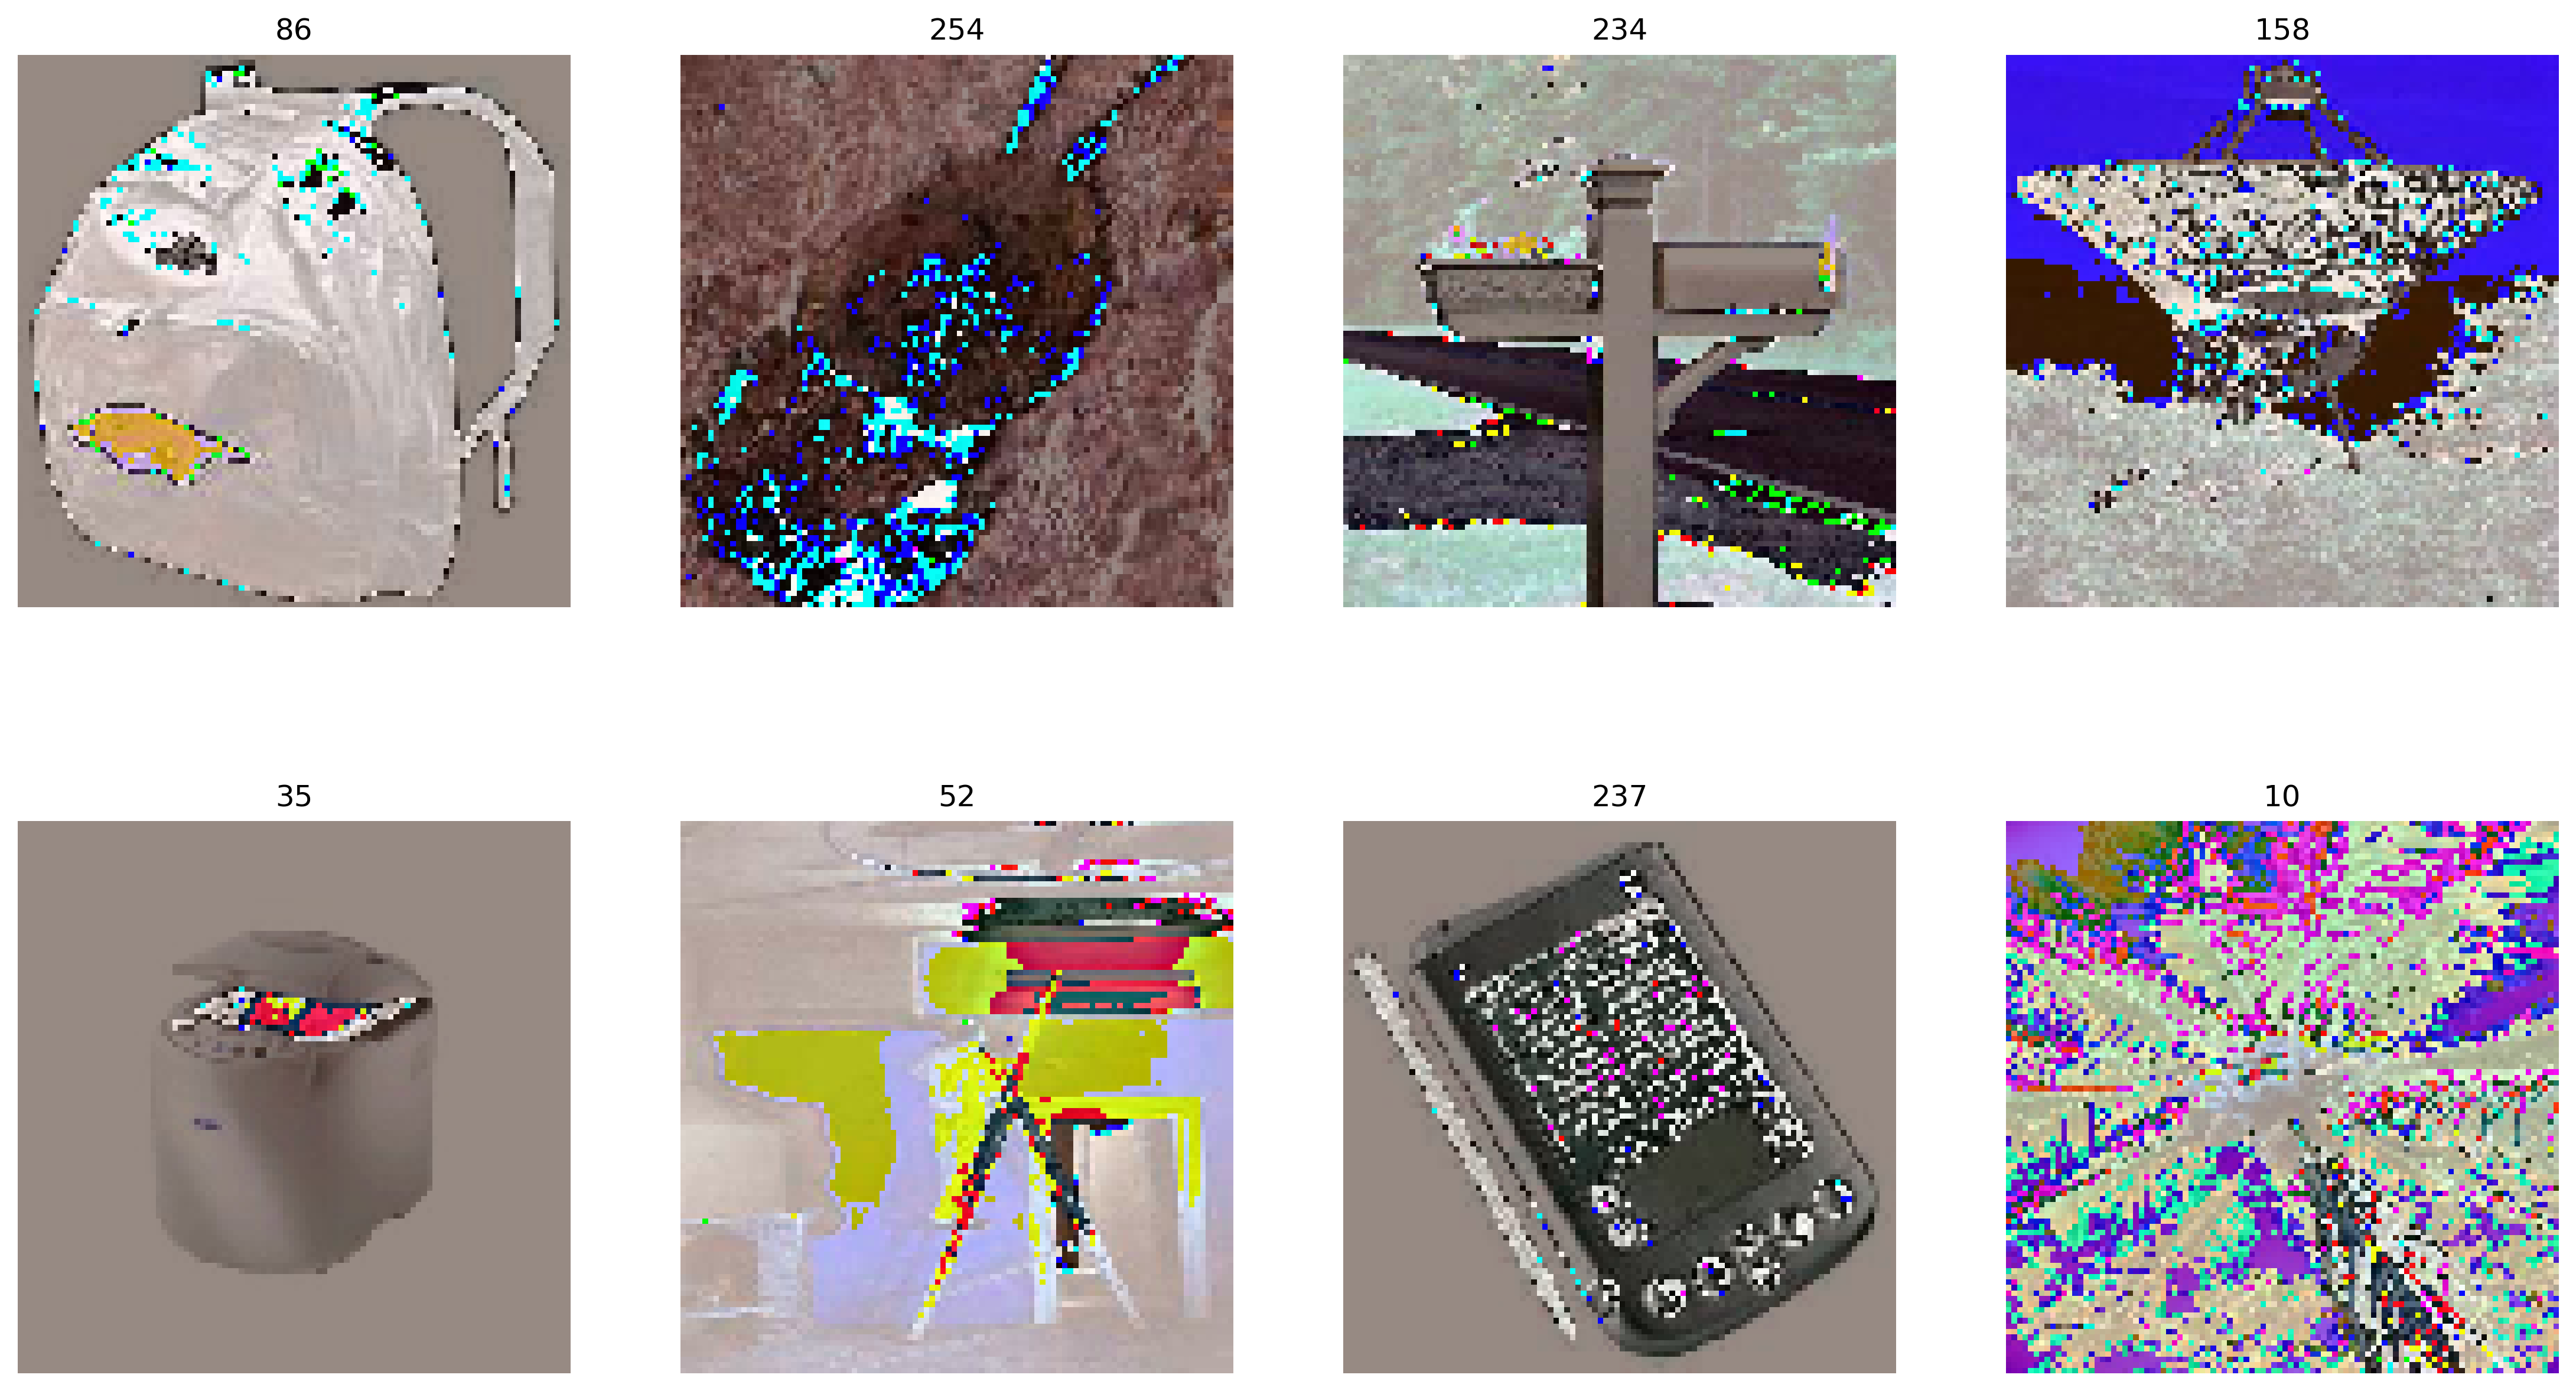

In [8]:
no_img = 8
images = np.random.choice(x.shape[0], no_img, replace=False)
f, axarr = plt.subplots(2,4)
f.set_size_inches(18.5, 10.5)
f.set_dpi(300)

for i in range(0,2):
    for j in range(0,4):
        image_index = images[(i*4)+(j+1)-1]
        axarr[i,j].imshow(x[image_index].reshape(100,100,3).astype('uint8'))
        axarr[i,j].set_title(y[image_index])
        axarr[i,j].axis('off')
plt.savefig('Sample.png')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


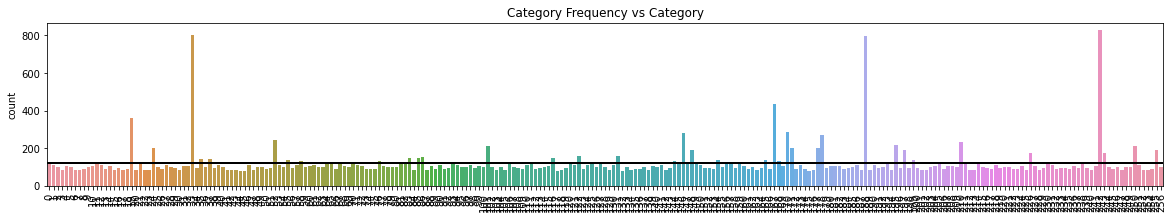

In [ ]:
plt.figure(figsize=(20,3))
ax = sns.countplot(y)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_title("Category Frequency vs Category")
plt.axhline(pd.Series(y).value_counts().mean(), color='k', linewidth=2,)
plt.show()

-----------------------------------------------------------------
-----------------------------------------------------------------

Split into train and test set

In [9]:
#lets shuffle all the data we have:
r = np.arange(x.shape[0])
np.random.seed(42)
np.random.shuffle(r)
x = x[r]
y = y[r]

x_train = x[:int(len(x)*.8)]
y_train = y[:int(len(x)*.8)]
x_test = x[int(len(x)*.8):]
y_test = y[int(len(x)*.8):]

In [10]:
print("Shape x_train:", x_train.shape)
print("Shape y_train:", y_train.shape)
print("Shape x_test:", x_test.shape)
print("Shape Y_test:", y_test.shape)

Shape x_train: (24486, 100, 100, 3)
Shape y_train: (24486,)
Shape x_test: (6122, 100, 100, 3)
Shape Y_test: (6122,)


In [11]:
num_classes = 257
input_shape = (100,100,3)

In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

CNN Architectures

VGG16

In [13]:
base = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(100, 100, 3)))
base.trainable=False

58892288/58889256 [==============================] - 1s 0us/step


In [14]:
# Freeze four convolution blocks
#for layer in base.layers[:19]:
#    layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(base.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


Resnet

In [ ]:
base = ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(100, 100, 3)))
base.trainable=False

234553344/234545216 [==============================] - 11s 0us/step


In [ ]:
# Freeze four convolution blocks
#for layer in base.layers[:19]:
#    layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(base.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv2_bloc

Densenet

In [ ]:
base = DenseNet201(weights="imagenet", include_top=True, input_tensor=Input(shape=(100, 100, 3)))
base.trainable=False

82526208/82524592 [==============================] - 0s 0us/step


In [ ]:
# Freeze four convolution blocks
#for layer in base.layers[:19]:
#    layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(base.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 zero_padding2d False
2 conv1/conv False
3 conv1/bn False
4 conv1/relu False
5 zero_padding2d_1 False
6 pool1 False
7 conv2_block1_0_bn False
8 conv2_block1_0_relu False
9 conv2_block1_1_conv False
10 conv2_block1_1_bn False
11 conv2_block1_1_relu False
12 conv2_block1_2_conv False
13 conv2_block1_concat False
14 conv2_block2_0_bn False
15 conv2_block2_0_relu False
16 conv2_block2_1_conv False
17 conv2_block2_1_bn False
18 conv2_block2_1_relu False
19 conv2_block2_2_conv False
20 conv2_block2_concat False
21 conv2_block3_0_bn False
22 conv2_block3_0_relu False
23 conv2_block3_1_conv False
24 conv2_block3_1_bn False
25 conv2_block3_1_relu False
26 conv2_block3_2_conv False
27 conv2_block3_concat False
28 conv2_block4_0_bn False
29 conv2_block4_0_relu False
30 conv2_block4_1_conv False
31 conv2_block4_1_bn False
32 conv2_block4_1_relu False
33 conv2_block4_2_conv False
34 conv2_block4_concat False
35 conv2_block5_0_bn False
36 conv2_block5_0_relu False
37 conv2_block5_1_

Add last FC layers

In [ ]:
base = InceptionResNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(100, 100, 3)))
base.trainable=False

In [ ]:
# Freeze four convolution blocks
#for layer in base.layers[:19]:
#    layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(base.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 conv2d False
2 batch_normalization False
3 activation False
4 conv2d_1 False
5 batch_normalization_1 False
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 False
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 False
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 False
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 False
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 False
24 batch_normalization_9 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 False
33 batch_normalization_7 False
34 batch_normalization_10 False
35 batch_normalization_11 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed_5b False
41 conv2d_15 False
42 batch_normalization_15 Fal

In [15]:
x = base.get_layer('block5_pool').output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(1000, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dense(257, activation='softmax')(x) # Softmax for multiclass

model = Model(inputs=base.input, outputs=x)

In [16]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

Train 1 - normal 

In [17]:
batch_size = 512
epochs = 20

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.25)

K.clear_session()

Epoch 1/20
36/36 [==============================] - 37s 743ms/step - loss: 14.8607 - accuracy: 0.0791 - val_loss: 4.1856 - val_accuracy: 0.2538
Epoch 2/20
36/36 [==============================] - 20s 563ms/step - loss: 3.8663 - accuracy: 0.2730 - val_loss: 3.2999 - val_accuracy: 0.3806
Epoch 3/20
36/36 [==============================] - 20s 574ms/step - loss: 2.8816 - accuracy: 0.4105 - val_loss: 2.8046 - val_accuracy: 0.4425
Epoch 4/20
36/36 [==============================] - 21s 593ms/step - loss: 2.2327 - accuracy: 0.5081 - val_loss: 2.5510 - val_accuracy: 0.4793
Epoch 5/20
36/36 [==============================] - 22s 610ms/step - loss: 1.8256 - accuracy: 0.5853 - val_loss: 2.4318 - val_accuracy: 0.4980
Epoch 6/20
36/36 [==============================] - 23s 637ms/step - loss: 1.5001 - accuracy: 0.6479 - val_loss: 2.3846 - val_accuracy: 0.5126
Epoch 7/20
36/36 [==============================] - 22s 617ms/step - loss: 1.3127 - accuracy: 0.6829 - val_loss: 2.3628 - val_accuracy: 0.527

Train 2 - Data augmentation

In [18]:
# create data generator
datagen = ImageDataGenerator(rotation_range=1, zoom_range=0.10,
	width_shift_range=0.1, height_shift_range=0.1,
	horizontal_flip=False, fill_mode="nearest")

# create iterator
it = datagen.flow(x_train, y_train, batch_size=batch_size)

In [19]:
batch_size = 512
epochs = 20

history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
            steps_per_epoch=len(x_train) / batch_size, epochs=epochs, validation_data = (x_test, y_test))

K.clear_session()

Epoch 1/20
47/47 [==============================] - 69s 1s/step - loss: 2.1442 - accuracy: 0.5996 - val_loss: 2.2757 - val_accuracy: 0.5575
Epoch 2/20
47/47 [==============================] - 65s 1s/step - loss: 1.8384 - accuracy: 0.6179 - val_loss: 2.2098 - val_accuracy: 0.5745
Epoch 3/20
47/47 [==============================] - 64s 1s/step - loss: 1.6302 - accuracy: 0.6455 - val_loss: 2.1260 - val_accuracy: 0.5797
Epoch 4/20
47/47 [==============================] - 64s 1s/step - loss: 1.4980 - accuracy: 0.6701 - val_loss: 2.0778 - val_accuracy: 0.5869
Epoch 5/20
47/47 [==============================] - 64s 1s/step - loss: 1.4142 - accuracy: 0.6818 - val_loss: 2.0620 - val_accuracy: 0.5900
Epoch 6/20
47/47 [==============================] - 64s 1s/step - loss: 1.2981 - accuracy: 0.7013 - val_loss: 2.0449 - val_accuracy: 0.5959
Epoch 7/20
47/47 [==============================] - 64s 1s/step - loss: 1.2226 - accuracy: 0.7172 - val_loss: 2.0516 - val_accuracy: 0.5992
Epoch 8/20
47/47 [==

Visualize results

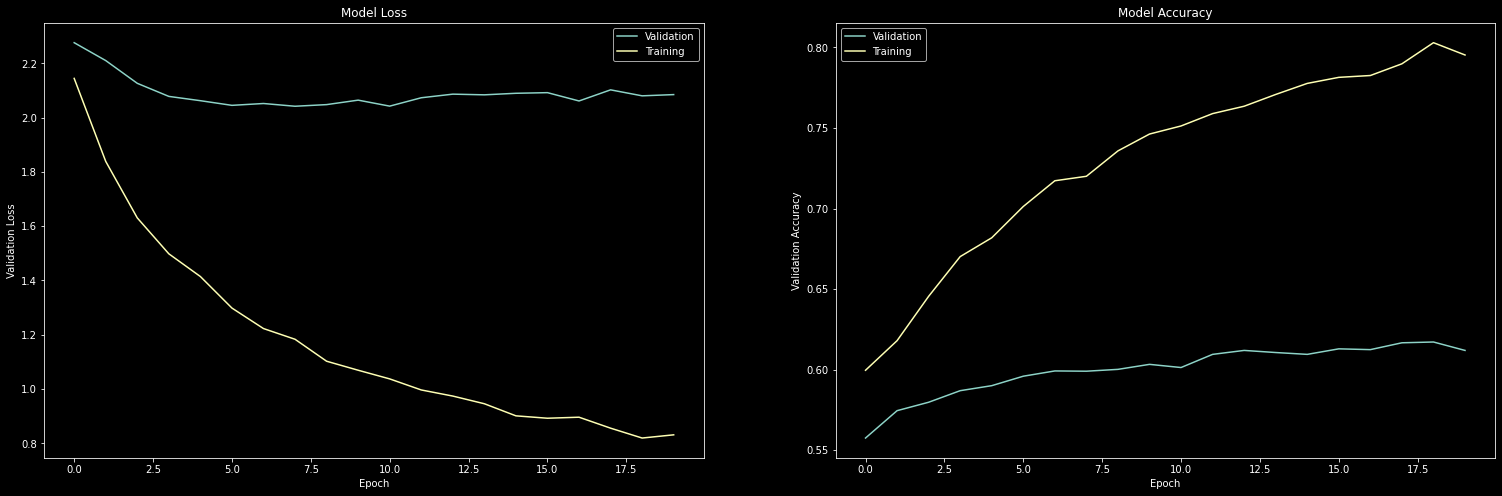

In [22]:
def plot_results(history):
    plt.figure(figsize=(26,8))
    plt.style.use('dark_background')
    
    # Plot the LOSS and ACCURACY model
    plt.subplot(1, 2, 1)

    plt.plot(history.history['val_loss'])
    plt.plot(history.history['loss'])
    
    plt.title('Model Loss')
    plt.ylabel('Validation Loss')
    plt.xlabel('Epoch')
    plt.legend(['Validation','Training'])

    plt.subplot(1, 2, 2)

    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['accuracy'])
    
    plt.title('Model Accuracy')
    plt.ylabel('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Validation','Training'])
    
    plt.show()

plot_results(history)

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)

print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  2.084453582763672
Test accuracy:  0.6118915677070618
